In [1]:
pip install Flask pandas numpy scikit-learn nltk


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.8/19.8 MB 38.2 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.3
    Uninstalling numpy-1.26.3:
      Successfully uninstalled numpy-1.26.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
daal4py 2021.6.0 requires daal==2021.4.0, which is not installed.
numba 0.55.1 requires numpy<1.22,>=1.18, but you have numpy 1.24.4 which is incompatible.

[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
data = pd.read_csv('WELFake_Dataset.csv')
data.tail()

,Unnamed: 0,title,text,label
72129,72129,Russians steal research on Trump in hack of U....,WASHINGTON (Reuters) - Hackers believed to be ...,0
72130,72130,WATCH: Giuliani Demands That Democrats Apolog...,"You know, because in fantasyland Republicans n...",1
72131,72131,Migrants Refuse To Leave Train At Refugee Camp...,Migrants Refuse To Leave Train At Refugee Camp...,0
72132,72132,Trump tussle gives unpopular Mexican leader mu...,MEXICO CITY (Reuters) - Donald Trump’s combati...,0
72133,72133,Goldman Sachs Endorses Hillary Clinton For Pre...,Goldman Sachs Endorses Hillary Clinton For Pre...,1


### 0 = fake and 1 = real

In [3]:
data.isnull().sum()

Unnamed: 0      0
title         558
text           39
label           0
dtype: int64

In [4]:
data.shape

(72134, 4)

In [5]:
data = data.rename(columns={'Unnamed: 0': 'id'})


### Cleaning the text


In [6]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

# Download NLTK stopwords data
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ujjwalsamanta/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/ujjwalsamanta/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [7]:
import pandas as pd
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer

# Assuming 'data' is your DataFrame
# If 'text' column contains non-string elements, you can convert them to string
data['text'] = data['text'].astype(str)

# Function to remove HTML tags
def remove_html_tags(text):
    clean = re.compile('<.*?>')
    return re.sub(clean, '', text)

# Function to remove URLs
def remove_urls(text):
    return re.sub(r'http\S+', '', text)

# Function to preprocess text
def preprocess_text(text):
    # Remove HTML tags
    text = remove_html_tags(text)
    
    # Remove URLs
    text = remove_urls(text)
    
    # Tokenize the text
    tokens = word_tokenize(text)
    
    # Remove punctuation
    tokens = [word for word in tokens if word.isalpha()]

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word.lower() not in stop_words]

    # Remove numbers
    tokens = [word for word in tokens if not word.isdigit()]

    # Lowercasing
    tokens = [word.lower() for word in tokens]

    # Remove extra whitespaces
    text = ' '.join(tokens)

    # Stemming
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(word) for word in tokens]

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    return ' '.join(tokens)

# Apply preprocessing to the 'text' column
data['preprocessed_text'] = data['text'].apply(preprocess_text)

# Display the result
print(data[['text', 'preprocessed_text']])


                                                    text  \
0      No comment is expected from Barack Obama Membe...   
1         Did they post their votes for Hillary already?   
2       Now, most of the demonstrators gathered last ...   
3      A dozen politically active pastors came here f...   
4      The RS-28 Sarmat missile, dubbed Satan 2, will...   
...                                                  ...   
72129  WASHINGTON (Reuters) - Hackers believed to be ...   
72130  You know, because in fantasyland Republicans n...   
72131  Migrants Refuse To Leave Train At Refugee Camp...   
72132  MEXICO CITY (Reuters) - Donald Trump’s combati...   
72133  Goldman Sachs Endorses Hillary Clinton For Pre...   

                                       preprocessed_text  
0      comment expect barack obama member fukyoflag b...  
1                              post vote hillari alreadi  
2      demonstr gather last night exercis constitut p...  
3      dozen polit activ pastor came privat

In [5]:
#data['preprocessed_text'][0]

In [6]:
#data['text'][0]

In [11]:
from nltk.tokenize import word_tokenize

# Assuming 'data' is your DataFrame
data['tokens'] = data['preprocessed_text'].apply(lambda x: word_tokenize(x))


In [15]:
# Assuming 'data' is the variable containing your list of tokens
output_file_path = 'output.txt'

with open(output_file_path, 'w') as file:
    token_paragraph = ','.join(data['tokens'][0])
    file.write(token_paragraph)

print(f'Tokens saved to {output_file_path}')


Tokens saved to output.txt


In [7]:
#data

### Spliting the dataset

In [8]:
from sklearn.model_selection import train_test_split

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(data['preprocessed_text'], data['label'], test_size=0.2, random_state=42)


### Model Declaration

In [9]:
from sklearn.pipeline import make_pipeline 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn import metrics
# Define multiple models
models = {
    'NaiveBayes': make_pipeline(TfidfVectorizer(), MultinomialNB()),
    'RandomForest': make_pipeline(TfidfVectorizer(), RandomForestClassifier())
    #'SVM': make_pipeline(TfidfVectorizer(), SVC())
}



In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

models = {
    'NaiveBayes': make_pipeline(CountVectorizer(), MultinomialNB()),
    'RandomForest': make_pipeline(CountVectorizer(), RandomForestClassifier())
}


In [10]:
# Example using Word2Vec (you'll need to have a pre-trained model or train one)
from gensim.models import Word2Vec
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import make_pipeline

word2vec_model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4)
word2vec_model.save("word2vec.model")

models = {
    'NaiveBayes': make_pipeline(CountVectorizer(), MultinomialNB()),
    'RandomForest': make_pipeline(CountVectorizer(), RandomForestClassifier()),
    'Word2Vec': make_pipeline(WordEmbeddingVectorizer(word2vec_model), RandomForestClassifier())
}


NameError: name 'sentences' is not defined

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from transformers import BertTokenizer, BertModel

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
bert_model = BertModel.from_pretrained('bert-base-uncased')

models = {
    'RandomForest': make_pipeline(TfidfVectorizer(), RandomForestClassifier()),
    'BERT': make_pipeline(BertVectorizer(tokenizer, bert_model), RandomForestClassifier())
}


### Train, predicting model and calculating Accuracy and Classification report

In [10]:
import joblib
# Train and evaluate each model
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = metrics.accuracy_score(y_test, y_pred)
    #accuracy = metrics.accuracy_score(y_test, y_pred)
    classification_report_result = metrics.classification_report(y_test, y_pred)
    
    # Print the accuracy and classification report for each model
    print(f"{model_name} Model Accuracy: {accuracy}")
    print(f"{model_name} Classification Report:\n{classification_report_result}")

    
    # Print the accuracy for each model
    #print(f"{model_name} Model Accuracy: {accuracy}")

    # Save each model
    joblib.dump(model, f'{model_name}_fake_news_detection_model.joblib')


NaiveBayes Model Accuracy: 0.8549247937894227
NaiveBayes Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.84      0.85      7089
           1       0.85      0.87      0.86      7338

    accuracy                           0.85     14427
   macro avg       0.86      0.85      0.85     14427
weighted avg       0.86      0.85      0.85     14427

RandomForest Model Accuracy: 0.928190198932557
RandomForest Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.91      0.93      7089
           1       0.92      0.94      0.93      7338

    accuracy                           0.93     14427
   macro avg       0.93      0.93      0.93     14427
weighted avg       0.93      0.93      0.93     14427



In [12]:
# Assuming X_train, y_train, X_test, and y_test are already defined and imported along with necessary libraries

# Extract the trained Naive Bayes model from the pipeline
naive_bayes_pipeline = models['NaiveBayes']
naive_bayes_model = naive_bayes_pipeline.named_steps['multinomialnb']

# Extract the TfidfVectorizer from the pipeline to get feature names
tfidf_vectorizer = naive_bayes_pipeline.named_steps['tfidfvectorizer']

# Use the appropriate method to get feature names based on your scikit-learn version
try:
    feature_names = tfidf_vectorizer.get_feature_names_out()
except AttributeError:
    # For older versions of scikit-learn
    feature_names = tfidf_vectorizer.get_feature_names()

# Get the log probabilities of features for each class
log_prob = naive_bayes_model.feature_log_prob_

# Example: Print the log probabilities for the first class
for feature_name, log_prob in zip(feature_names, log_prob[0]):
    print(f"{feature_name}: {log_prob}")


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)




unnervingli: -12.853684796720826
unnessarili: -12.935814841514917
unngå: -12.935814841514917
unngått: -12.935814841514917
unni: -12.785311221581669
unnim: -12.874097154785142
unnj: -12.935814841514917
unnorm: -12.935814841514917
unnot: -11.823101866252443
unnotic: -12.935814841514917
unnötig: -12.935814841514917
uno: -12.744536994159311
unoak: -12.86794975195937
unobjection: -12.786799589736411
unoblig: -12.81545852485182
unobserv: -12.935814841514917
unobstruct: -12.82008923844729
unobtain: -12.72987637376087
unobtrus: -12.878955047771507
unoc: -12.73260222519513
unoccupi: -12.541489886770252
unodc: -12.62911196087861
unoffici: -10.857975456816522
unop: -12.651012374256895
unopen: -12.737175209894227
unoppos: -12.300154065421525
unordinari: -12.935814841514917
unorgan: -12.744430968263403
unorganis: -12.841701708430016
unorigin: -12.819951842431813
unorna: -12.914015952247995
unorthodox: -11.229492138090489
unpack: -12.481765696287578
unpackag: -12.829321318623895
unpacu: -12.7690876

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn import metrics
import joblib

# Assuming you have X_train, y_train, X_test, and y_test defined

# Create a pipeline with TfidfVectorizer and Multinomial Naive Bayes
model_nb = make_pipeline(TfidfVectorizer(token_pattern=r'\b[a-zA-Z0-9_]+\b'), MultinomialNB())

# Train the Naive Bayes model
model_nb.fit(X_train, y_train)

# Extract feature names from TfidfVectorizer
feature_names = model_nb.named_steps['tfidfvectorizer'].get_feature_names()

# Extract most informative features
most_informative_features = model_nb.named_steps['multinomialnb'].coef_[0].argsort()

# Display the top N important words for each class (0 and 1)
N = 10  # Set the desired number of top words to display
top_positive_words = [feature_names[idx] for idx in most_informative_features[-N:]]
top_negative_words = [feature_names[idx] for idx in most_informative_features[:N]]

print("NaiveBayes Top positive words (class 1):", top_positive_words)
print("NaiveBayes Top negative words (class 0):", top_negative_words)


NaiveBayes Top positive words (class 1): ['like', 'state', 'one', 'u', 'obama', 'presid', 'peopl', 'hillari', 'clinton', 'trump']
NaiveBayes Top negative words (class 0): ['frauenfrag', 'issam', 'tennesseevmi', 'issah', 'issacharoff', 'repossi', 'israellycool', 'issandr', 'israelindependenceday', 'ispot']


/Users/ujjwalsamanta/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute coef_ was deprecated in version 0.24 and will be removed in 1.1 (renaming of 0.26).
  warnings.warn(msg, category=FutureWarning)


NaiveBayes Model Accuracy: 0.8549247937894227
NaiveBayes Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.84      0.85      7089
           1       0.85      0.87      0.86      7338

    accuracy                           0.85     14427
   macro avg       0.86      0.85      0.85     14427
weighted avg       0.86      0.85      0.85     14427



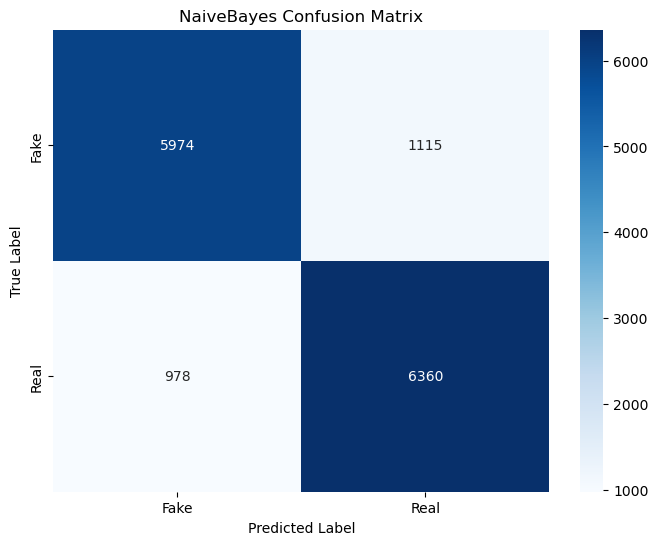

RandomForest Model Accuracy: 0.930200318846607
RandomForest Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.92      0.93      7089
           1       0.92      0.94      0.93      7338

    accuracy                           0.93     14427
   macro avg       0.93      0.93      0.93     14427
weighted avg       0.93      0.93      0.93     14427



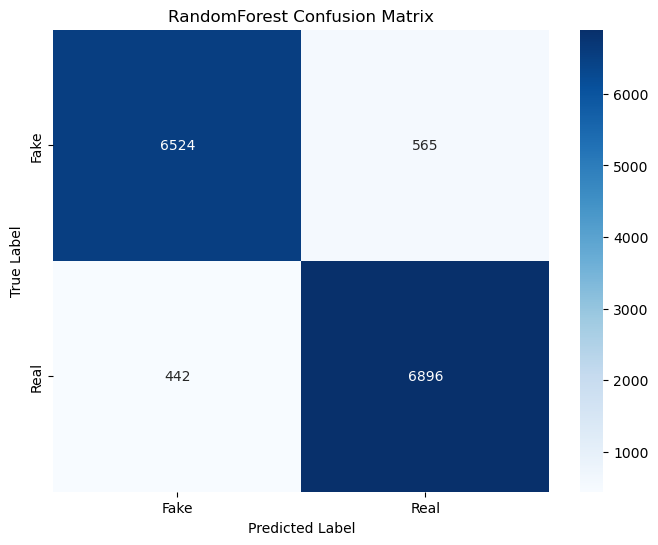

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import joblib


# Assuming 'models' and 'joblib' are already imported

# Define a function to evaluate and visualize models
def evaluate_and_visualize_models(models, X_test, y_test):
    results = {}
    
    for model_name, model in models.items():
        # Load the trained model
        loaded_model = joblib.load(f'{model_name}_fake_news_detection_model.joblib')
        
        # Predict on the test set
        y_pred = loaded_model.predict(X_test)
        
        # Evaluate the model
        accuracy = metrics.accuracy_score(y_test, y_pred)
        classification_report_result = metrics.classification_report(y_test, y_pred)
        confusion_matrix_result = confusion_matrix(y_test, y_pred)
        
        # Store the results
        results[model_name] = {
            'accuracy': accuracy,
            'classification_report': classification_report_result,
            'confusion_matrix': confusion_matrix_result
        }
        
        # Print the results
        print(f"{model_name} Model Accuracy: {accuracy}")
        print(f"{model_name} Classification Report:\n{classification_report_result}")
        
        # Create a confusion matrix heatmap
        plt.figure(figsize=(8, 6))
        sns.heatmap(confusion_matrix_result, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
        plt.title(f"{model_name} Confusion Matrix")
        plt.xlabel('Predicted Label')
        plt.ylabel('True Label')
        plt.show()
    
    return results

# Call the function with the trained models and test data
results = evaluate_and_visualize_models(models, X_test, y_test)


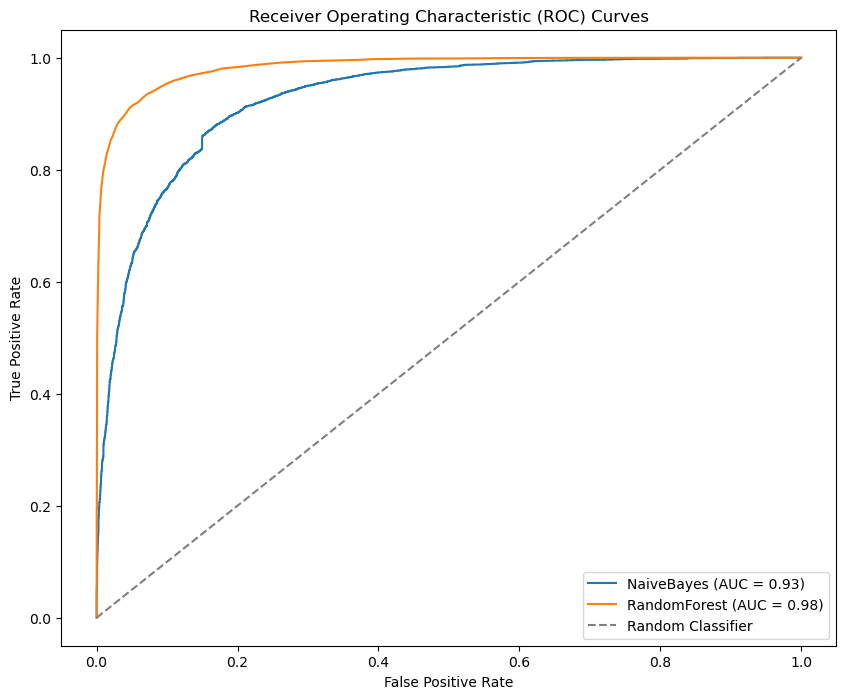

In [14]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

# Define a function to plot ROC curves
def plot_roc_curves(models, X_test, y_test):
    # Binarize the labels
    y_test_bin = label_binarize(y_test, classes=[0, 1])
    
    plt.figure(figsize=(10, 8))
    
    for model_name, model in models.items():
        # Load the trained model
        loaded_model = joblib.load(f'{model_name}_fake_news_detection_model.joblib')
        
        # Predict probabilities for positive class
        y_scores = loaded_model.predict_proba(X_test)[:, 1]
        
        # Compute ROC curve and ROC area for each class
        fpr, tpr, _ = roc_curve(y_test_bin, y_scores)
        roc_auc = auc(fpr, tpr)
        
        # Plot ROC curve
        plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

    # Plot the diagonal line (random classifier)
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Classifier')
    
    # Set labels and title
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curves')
    plt.legend()
    plt.show()

# Call the function with the trained models and test data
plot_roc_curves(models, X_test, y_test)


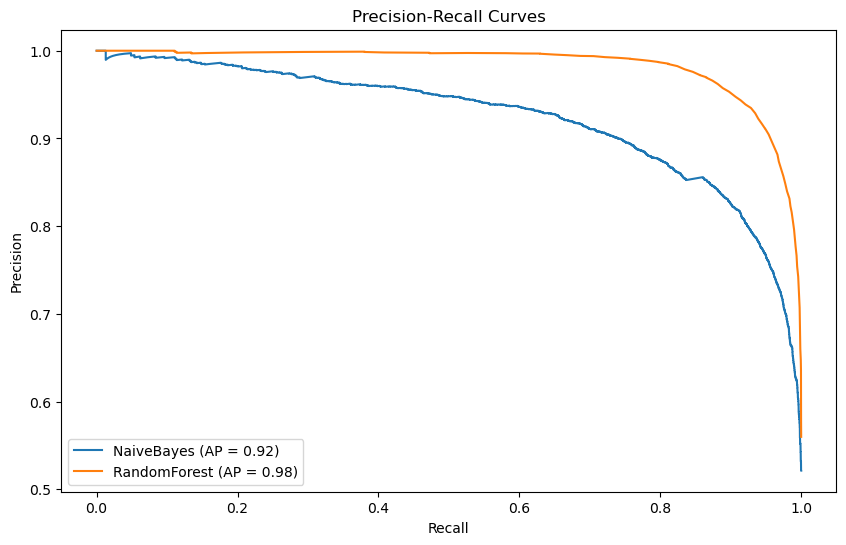

In [19]:
from sklearn.metrics import precision_recall_curve, average_precision_score

# Assuming you have stored precision values in a list named 'precisions'
model_names = list(models.keys())

plt.figure(figsize=(10, 6))

for model_name, model in models.items():
    if hasattr(model, 'decision_function'):
        # For models with decision_function (e.g., SVM)
        y_scores = model.decision_function(X_test)
    elif hasattr(model, 'predict_proba'):
        # For models with predict_proba (e.g., Naive Bayes, RandomForest)
        y_scores = model.predict_proba(X_test)[:, 1]
    else:
        raise ValueError(f"Model {model_name} does not have decision_function or predict_proba")

    precision, recall, _ = precision_recall_curve(y_test, y_scores)
    average_precision = average_precision_score(y_test, y_scores)

    # Plot precision-recall curve
    plt.plot(recall, precision, label=f'{model_name} (AP = {average_precision:.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curves')
plt.legend()
plt.show()


### Creating word cloud  for orignal and fake news

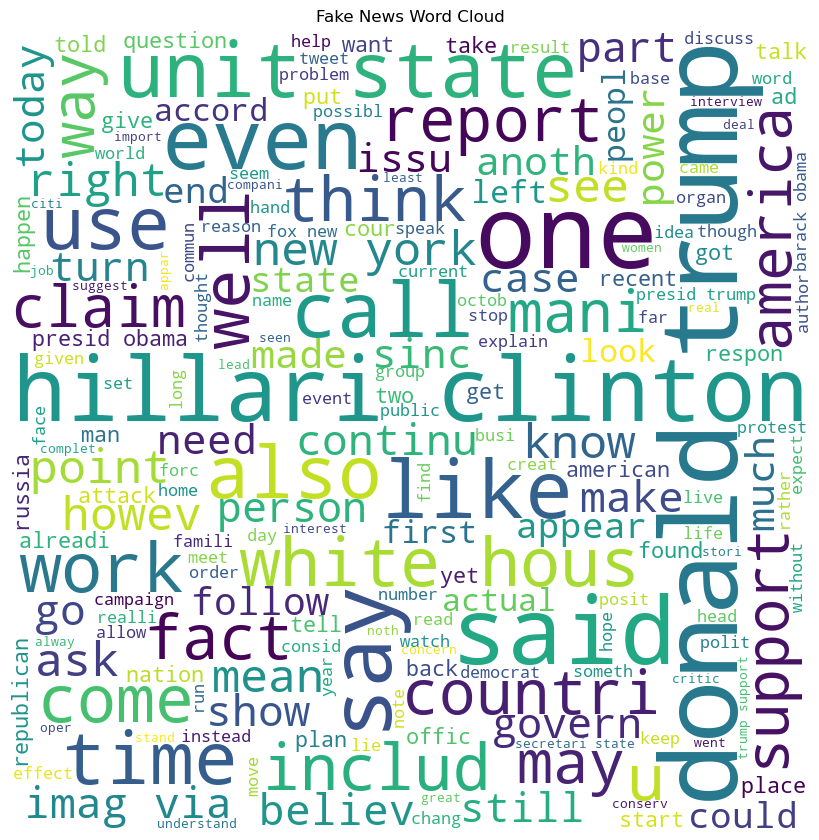

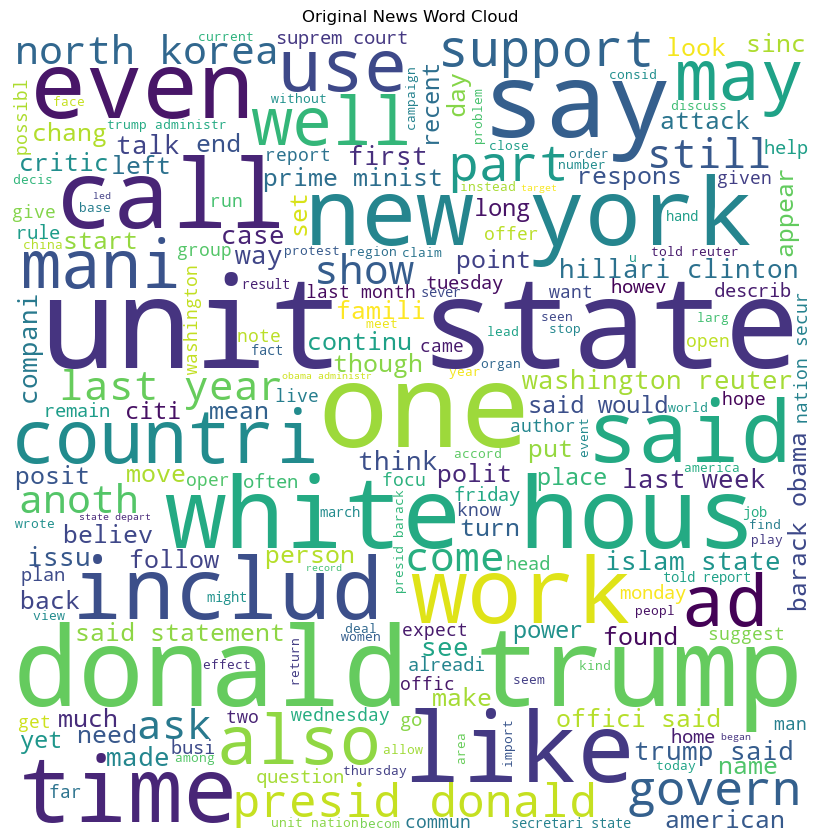

In [24]:
import pandas as pd
import nltk
from wordcloud import WordCloud  # Import WordCloud class
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

# Assuming 'data' is your DataFrame
# If 'text' column contains non-string elements, you can convert them to string
data['text'] = data['text'].astype(str)

# Function to remove HTML tags
def remove_html_tags(text):
    clean = re.compile('<.*?>')
    return re.sub(clean, '', text)

# Function to remove URLs
def remove_urls(text):
    return re.sub(r'http\S+', '', text)

# Function to preprocess text
def preprocess_text(text):
    # Remove HTML tags
    text = remove_html_tags(text)
    
    # Remove URLs
    text = remove_urls(text)
    
    # Tokenize the text
    tokens = word_tokenize(text)
    
    # Remove punctuation
    tokens = [word for word in tokens if word.isalpha()]

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word.lower() not in stop_words]

    # Initialize stemmer
    stemmer = PorterStemmer()
    
    # Apply stemming
    words = [stemmer.stem(word) for word in tokens]
    
    # Lowercasing
    words = [word.lower() for word in words]

    return ' '.join(words)

# Apply preprocessing to the 'text' column
data['preprocessed_text'] = data['text'].apply(preprocess_text)

# Separate data into fake and original categories
fake_data = data[data['label'] == 1]  # Assuming 'label' column denotes fake (1) or original (0)
original_data = data[data['label'] == 0]

# Function to generate word clouds
def generate_wordcloud(data, title):
    # Define stop_words here or pass it as an argument
    stop_words = set(stopwords.words('english'))
    
    wordcloud = WordCloud(width=800, height=800, 
                    background_color='white', 
                    stopwords=stop_words, 
                    min_font_size=10).generate(' '.join(data['preprocessed_text']))

    # Plot the WordCloud image                        
    plt.figure(figsize=(8, 8), facecolor=None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad=0) 
    plt.title(title)
  
    plt.show()

# Generate word clouds for fake and original data
generate_wordcloud(fake_data, 'Fake News Word Cloud')
generate_wordcloud(original_data, 'Original News Word Cloud')


In [13]:
X_train

60264    Although Tesla CEO Elon Musk shocked Silicon V...
42050    Donald J. Trump often cites his undergraduate ...
62289    Border Patrol agents from the Yuma and El Cent...
66421    So, the working people of America are basicall...
50850    The FBI reportedly has found emails from Hilla...
                               ...                        
37194    Let us have a look at the data for today \n. \...
6265                                                      
54886    (Reuters) - Vanguard Group Chief Executive Bil...
860      A school district in Kentucky has canceled the...
15795    This one sentence should scare every taxpaying...
Name: text, Length: 57707, dtype: object

### Ploting graphs Accuracy Vs Iterations

In [27]:
import numpy as np

# Convert the Pandas Series to a NumPy array
X_train_array = np.array(X_train)

# Reshape the array
X_train = X_train_array.reshape(-1, 1)


In [28]:
X_test_array = np.array(X_test)
X_test = X_test_array.reshape(-1, 1)


### Detecting Fake News

In [12]:
data['text'][0]

'comment expect barack obama member fyf911 fukyoflag blacklivesmatt movement call lynch hang white peopl cop encourag radio show tuesday night turn tide kill white peopl cop send messag kill black peopl f yoflag organ call sunshin ha radio blog show host texa call sunshin f ing opinion radio show snapshot fyf911 lolatwhitefear twitter page show wa urg support call fyf911 tonight continu dismantl illus white snapshot twitter radio call invit fyf911th radio show air eastern standard show caller clearli call lynch kill white minut clip radio show heard wa provid breitbart texa someon would like refer hannib ha alreadi receiv death threat result interrupt fyf911 confer unidentifi black man said mother f ker themselv start f ing like us bunch ni er takin one us roll said caus alreadi roll gang anyway six seven black mother f cker see white person lynch ass let turn tabl conspir cop start lose peopl state emerg specul one two thing would happen r war ni er go start backin alreadi get kill f 

### 0 = fake and 1 = real

In [11]:
original= data[data['label']==1]
orignal

,id,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,1,NaN,Did they post their votes for Hillary already?,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1
5,5,About Time! Christian Group Sues Amazon and SP...,All we can say on this one is it s about time ...,1
...,...,...,...,...
72125,72125,WOW! JILL STEIN’S ‘FIRESIDE CHAT’ Exposes Her ...,,1
72127,72127,WIKILEAKS EMAIL SHOWS CLINTON FOUNDATION FUNDS...,An email released by WikiLeaks on Sunday appea...,1
72128,72128,JUDGE JEANINE SOUNDS FREE SPEECH ALARM: “They ...,Judge Jeanine lets it rip! She s concerned wit...,1
72130,72130,WATCH: Giuliani Demands That Democrats Apolog...,"You know, because in fantasyland Republicans n...",1


In [7]:
fake= data[data['label']==0]
fake

,id,title,text,label
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
11,11,"May Brexit offer would hurt, cost EU citizens ...",BRUSSELS (Reuters) - British Prime Minister Th...,0
12,12,Schumer calls on Trump to appoint official to ...,"WASHINGTON (Reuters) - Charles Schumer, the to...",0
14,14,No Change Expected for ESPN Political Agenda D...,As more and more sports fans turn off ESPN to ...,0
15,15,Billionaire Odebrecht in Brazil scandal releas...,RIO DE JANEIRO/SAO PAULO (Reuters) - Billionai...,0
...,...,...,...,...
72124,72124,An Unlikely Contender Rises in France as the A...,"PARIS — In the age of Donald J. Trump, “Bre...",0
72126,72126,Determined to kill: Can tough gun laws end mas...,The flag at Desert Hot Springs' Condor Gun Sho...,0
72129,72129,Russians steal research on Trump in hack of U....,WASHINGTON (Reuters) - Hackers believed to be ...,0
72131,72131,Migrants Refuse To Leave Train At Refugee Camp...,Migrants Refuse To Leave Train At Refugee Camp...,0


### Image Detection


In [14]:
import os
from PIL import Image, ImageDraw, ImageFont
import textwrap


# Create directories if they don't exist
fake_dir = 'fake_images'
original_dir = 'original_images'

os.makedirs(fake_dir, exist_ok=True)
os.makedirs(original_dir, exist_ok=True)

def text_to_image(news_entry, output_image_path, label):
    # Image size and background color
    img_width, img_height = 800, 600
    bg_color = "white" if not label else "lightyellow"  # Use label to determine background color

    # Create a new image with a white or lightyellow background
    img = Image.new("RGB", (img_width, img_height), bg_color)
    draw = ImageDraw.Draw(img)

    # Use a default font
    font_size = 20
    font = ImageFont.load_default()

    # Set text color
    text_color = "black" if not label else "red"  # Use label to determine text color

    # Replace non-ASCII characters with a placeholder
    text = ''.join(char if ord(char) < 128 else '?' for char in str(news_entry['text']))

    # Add text to the image
    text_lines = textwrap.wrap(text, width=50)  # Wrap text to fit the image width
    y_position = 50
    for line in text_lines:
        draw.text((50, y_position), line, font=font, fill=text_color)
        y_position += font.getsize(line)[1]

    # Save the image to the appropriate directory
    if label == 0:
        img.save(os.path.join(original_dir, output_image_path))
    elif label == 1:
        img.save(os.path.join(fake_dir, output_image_path))

# Assuming 'fake' and 'original' are DataFrames
for index, news_entry in fake.iterrows():
    image_path = f"fake_news_image_{news_entry['id']}.png"
    text_to_image(news_entry, image_path, label=news_entry['label'])

for index, news_entry in original.iterrows():
    image_path = f"original_news_image_{news_entry['id']}.png"
    text_to_image(news_entry, image_path, label=news_entry['label'])


/var/folders/6s/hdwy5qm16y7grjqwnqg7blxh0000gn/T/ipykernel_28617/2626786794.py:37: DeprecationWarning: getsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use getbbox or getlength instead.
  y_position += font.getsize(line)[1]


In [15]:
import os
import shutil
from sklearn.model_selection import train_test_split

# Specify paths to your original and fake image folders
original_images_path = 'original_images'
fake_images_path = 'fake_images'

# Split ratio for train-test split
test_size = 0.2

# Get lists of original and fake image filenames, filtering out directories
original_image_files = [f for f in os.listdir(original_images_path) if os.path.isfile(os.path.join(original_images_path, f))]
fake_image_files = [f for f in os.listdir(fake_images_path) if os.path.isfile(os.path.join(fake_images_path, f))]

# Split the original and fake image filenames into training and testing sets
original_train, original_test = train_test_split(original_image_files, test_size=test_size, random_state=42)
fake_train, fake_test = train_test_split(fake_image_files, test_size=test_size, random_state=42)

# Specify paths for your train and test folders dynamically
train_folder = 'train1'
test_folder = 'test1'

# Create train and test folders if they don't exist
os.makedirs(train_folder, exist_ok=True)
os.makedirs(test_folder, exist_ok=True)

# Move a mixture of original and fake files to the train folder
for filename in original_train:
    shutil.copy(os.path.join(original_images_path, filename), os.path.join(train_folder, filename))

for filename in fake_train:
    shutil.copy(os.path.join(fake_images_path, filename), os.path.join(train_folder, filename))

# Move a mixture of original and fake files to the test folder
for filename in original_test:
    shutil.copy(os.path.join(original_images_path, filename), os.path.join(test_folder, filename))

for filename in fake_test:
    shutil.copy(os.path.join(fake_images_path, filename), os.path.join(test_folder, filename))


In [14]:
import os
import shutil
from sklearn.model_selection import train_test_split

# Specify paths to your original and fake image folders
original_images_path = 'original_images'
fake_images_path = 'fake_images'

# Split ratio for train-test split
test_size = 0.2

# Get lists of original and fake image filenames
original_image_files = os.listdir(original_images_path)
fake_image_files = os.listdir(fake_images_path)

# Split the original and fake image filenames into training and testing sets
original_train, original_test = train_test_split(original_image_files, test_size=test_size, random_state=42)
fake_train, fake_test = train_test_split(fake_image_files, test_size=test_size, random_state=42)

# Specify paths for your train and test folders dynamically
train_folder = 'path/to/train'
test_folder = 'path/to/test'

# Create train and test folders if they don't exist
os.makedirs(train_folder, exist_ok=True)
os.makedirs(test_folder, exist_ok=True)

# Move the files to the train and test folders
for filename in original_train:
    shutil.copy(os.path.join(original_images_path, filename), os.path.join(train_folder, filename))

for filename in original_test:
    shutil.copy(os.path.join(original_images_path, filename), os.path.join(test_folder, filename))

for filename in fake_train:
    shutil.copy(os.path.join(fake_images_path, filename), os.path.join(train_folder, filename))

for filename in fake_test:
    shutil.copy(os.path.join(fake_images_path, filename), os.path.join(test_folder, filename))
